## 引入包

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopy import distance

## 导入数据

In [15]:
df1 = pd.read_excel('1.xlsx')
df2 = pd.read_excel('2.xlsx')


In [16]:
df1

,节点,传感器经度,传感器纬度
0,数据中心,120.701520,36.374227
1,传感器1,120.698717,36.374576
2,传感器2,120.699795,36.375912
3,传感器3,120.706910,36.375796
4,传感器4,120.705616,36.372483
5,传感器5,120.703173,36.377540
6,传感器6,120.692896,36.378005
7,传感器7,120.694334,36.375215
8,传感器8,120.697352,36.378760
9,传感器9,120.696202,36.376435


In [17]:
df2

,节点,传感器经度,传感器纬度,能量消耗速率(mA/h)
0,数据中心,120.701520,36.374227,/
1,传感器1,120.698717,36.374576,5.4
2,传感器2,120.699795,36.375912,7.8
3,传感器3,120.706910,36.375796,4.5
4,传感器4,120.705616,36.372483,5.5
5,传感器5,120.703173,36.377540,3.6
6,传感器6,120.692896,36.378005,4.5
7,传感器7,120.694334,36.375215,6.4
8,传感器8,120.697352,36.378760,4.6
9,传感器9,120.696202,36.376435,4.5


## 初步可视化

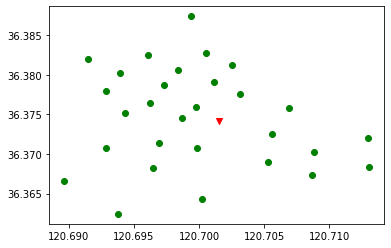

In [18]:
fig  = plt.gcf()
# fig.set_size_inches(10,10)
# plt.plot()
plt.scatter(df1['传感器经度'][0],df1['传感器纬度'][0],alpha=1,c='red',marker='v')
plt.scatter(df1['传感器经度'][1:],df1['传感器纬度'][1:],alpha=1,c='green')
plt.show()

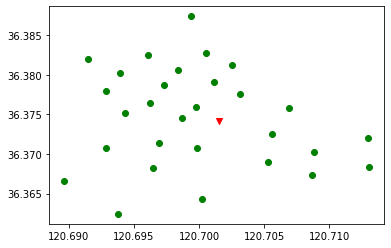

In [19]:
fig  = plt.gcf()
# fig.set_size_inches(10,10)
# plt.plot()
plt.scatter(df2['传感器经度'][0],df2['传感器纬度'][0],alpha=1,c='red',marker='v')
plt.scatter(df2['传感器经度'][1:],df2['传感器纬度'][1:],alpha=1,c='green')
plt.show()

## 计算大地距离

In [43]:
# distance_matrix = np.zeros((len(df1),len(df1))
for j in range(len(df1)):
    for i in range(len(df1)):
        position1 = (df1['传感器纬度'][i],df1['传感器经度'][i])
        position2 = (df1['传感器纬度'][j],df1['传感器经度'][j])
        d = distance.distance(position1, position2).m
        # print(position1,position2,d)
        distance_matrix[i][j] = d

In [44]:
# adjust the data format for tsp program 
# distance_matrix is the distance matrix between points
distance = {}
for i in range(30):
    for j in range(30):
        if j>i:
            distance[(i,j)] = int(distance_matrix[i][j])
assert len(distance)==435
s = ""
for k,v in distance.items():
    s+="{} {} {}\n".format(k[0],k[1],v)
fw = open('data.txt','w',encoding='utf-8')
fw.write(s)
fw.close()

标为(120.692896455016,36.3780045662363),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.694333743832,36.3752149859956),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.697352050345,36.3787600601826),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.696202219292,36.3764354397698),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.701160865707,36.379050632806),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.693902557187,36.3802129123481),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.698358152516,36.3805615927938),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.702526290083,36.3812008361815),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.6914591662,36.3820144110088),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.696058490411,36.382479307055),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.70051408574,36.3827698656601),数据点2坐标为(120.708850360873,36.3702167356635)
输入的数据点1坐标为(120.699867305773,36.370

## 第一问

In [12]:
import tsp
# Distance Matrix
mat = distance_matrix.tolist()
r = range(len(mat))
# Dictionary of distance
dist = {(i, j): mat[i][j] for i in r for j in r}
print(tsp.tsp(r, dist))

(12116.649039972724, [0, 17, 20, 19, 18, 25, 26, 29, 21, 23, 24, 28, 22, 4, 3, 5, 10, 13, 16, 27, 15, 12, 8, 11, 14, 6, 7, 9, 1, 2])


## 第二问

## 第三问